### Importing Libraries

In [1]:
import obspy as obs
import matplotlib.pyplot as plt


from andbro__get_data_archive import __get_data_archive
from andbro__filter_traces import __filter_traces
from andbro__fft import __fft
from andbro__save_to import __save_to

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from numpy import array, arange, linspace


plt.style.use('default')

%matplotlib inline

### Defining Methods

In [2]:

def __makeplot_rawandfiltered(f1_raw, f2_raw, f1_fil, f2_fil):
    
    fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,10))

    font=14
    
    tbeg = f1_raw[0].stats.starttime
    
    ##-----------
    ax1.plot(f1_raw[0].times(),f1_raw[0],label='F1')
    ax1.plot(f2_raw[0].times(),f2_raw[0],label='F2')

    ##-----------
    ax2.plot(f1_fil[0].times(),f1_fil[0],label='F1')
    ax2.plot(f2_fil[0].times(),f2_fil[0],label='F2')

    ##-----------  
    diff = array(f1_fil[0])-array(f2_fil[0])
    ax3.plot(f1_fil[0].times(),diff,label='F1-F2',color='k')
    
    
#    ax1.set_xlim(0,0.25)
#    ax2.set_xlim(0,0.25)

    ax1.set_ylabel('Amplitude',fontsize=font); #ax1.set_xlabel(f'Time in s [from {str(dt.date)} {str(dt.time)} UTC]',fontsize=font)
    ax2.set_ylabel('Amplitude',fontsize=font); #ax2.set_xlabel(f'Time in s [from {str(dt.date)} {str(dt.time)} UTC]',fontsize=font)
    ax3.set_ylabel('F1-F2',fontsize=font); ax3.set_xlabel(f'Time in s [from {str(tbeg.date)} {str(tbeg.time)} UTC]',fontsize=font)

    
    ax1.grid('On'); ax2.grid('On'); ax3.grid('On'); 

    ax1.legend(bbox_to_anchor=(0.3, 1.3),fontsize=font, ncol=2)
    
    ## _________________________________________________________________
    ## zoom in 
    axins1 = ax1.inset_axes([0.55, 0.9, 0.45, 0.5])
    axins1.plot(f1_raw[0].times(),f1_raw[0])
    axins1.plot(f2_raw[0].times(),f2_raw[0])
        
    mark_inset(ax1, axins1, loc1=3, loc2=4, ec='0.1',zorder=2)
    x1, x2 = 400.00, 400.10
    axins1.set_xlim(x1, x2)
    axins1.set_ylim(min([min(f1_raw[0]), min(f2_raw[0])]), max([max(f1_raw[0]), max(f2_raw[0])]) )
    axins1.set_xticklabels('')
    axins1.set_yticklabels('')

    ## _________________________________________________________________
    ## zoom in 
    axins2 = ax2.inset_axes([0.55, 0.9, 0.45, 0.5])
    axins2.plot(f1_fil[0].times(),f1_fil[0])
    axins2.plot(f2_fil[0].times(),f2_fil[0])
        
    mark_inset(ax2, axins2, loc1=3, loc2=4, ec='0.1',zorder=2)
    x1, x2 = 400, 600
    axins2.set_xlim(x1, x2)
    axins2.set_ylim(min([min(f1_fil[0]), min(f2_fil[0])]), max([max(f1_fil[0]), max(f2_fil[0])]))
    axins2.set_xticklabels('')
    axins2.set_yticklabels('')   

    ## _________________________________________________________________
    ## zoom in 
    axins3 = ax3.inset_axes([0.55, 0.9, 0.45, 0.5])
    axins3.plot(f1_fil[0].times(),diff,color='k')
        
    mark_inset(ax3, axins3, loc1=3, loc2=4, ec='0.1',zorder=2)
    x1, x2 = 400, 600
    axins3.set_xlim(x1, x2)
    axins3.set_ylim(min([min(f1_fil[0]), min(f2_fil[0])]), max([max(f1_fil[0]), max(f2_fil[0])]))
    axins3.set_xticklabels('')
    axins3.set_yticklabels('') 


    plt.show();
    return fig


In [3]:

def __makeplot_spectra(f1, f1_fil, f2, f2_fil, flow, fhigh, freq):

    
    f1_fft , ff1 = __fft(f1_fil[0], f1[0].stats.delta, window=None, normalize=None)
    f2_fft , ff2 = __fft(f2_fil[0], f2[0].stats.delta, window=None, normalize=None)
    
    ## _____________________________________________________________
    ##
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,10))

    cut=5

    ax1.plot(ff1[cut:],f1_fft[cut:])


    ax2.plot(ff2[cut:],f2_fft[cut:],color='C1')


    ax1.set_xlim(freq[0],freq[1])
    #ax1.set_ylim(0,200)


    ax2.set_xlim(freq[0],freq[1])
    #ax2.set_ylim(0,200)

    ax1.set_ylabel('Spectral Amplitude'); ax1.set_xlabel('Frequency in Hz')
    ax2.set_ylabel('Spectral Amplitude'); ax2.set_xlabel('Frequency in Hz')
    
    ax1.grid('On'); ax2.grid('On'); 

    ## _________________________________________________________________
    ## zoom in 
    axins1 = ax1.inset_axes([0.55, 0.6, 0.45, 0.4])
    axins1.plot(ff1[cut:],f1_fft[cut:])
    mark_inset(ax1, axins1, loc1=3, loc2=4, ec='0.5')
    x11, x21 = flow, fhigh
    axins1.set_xlim(x11, x21)
    axins1.set_ylim(0, max(f1_fft[cut:])+0.1*max(f1_fft[cut:]))
#     axins1.set_xticklabels('')
    axins1.set_yticklabels('')


    ## _________________________________________________________________
    ## zoom in 
    axins2 = ax2.inset_axes([0.55, 0.6, 0.45, 0.4])
    axins2.plot(ff2[cut:],f2_fft[cut:],color='C1')
    mark_inset(ax2, axins2, loc1=3, loc2=4, ec='0.5')
    x12, x22 = flow, fhigh
    axins2.set_xlim(x12, x22)
    axins2.set_ylim(0, max(f2_fft[cut:])+0.1*max(f2_fft[cut:]))
#     axins2.set_xticklabels('')
    axins2.set_yticklabels('')


    plt.show();
    return fig
 

In [4]:

def __makeplot_trace_and_spectrum(trace, timeline, fmax=None):

    N = trace.stats.npts
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    trace_fft, ff = __fft(signal_in=trace, dt=trace.stats.delta , window=None, normalize=None)

    ax1.plot(timeline, trace)

    ax2.plot(ff[:N // 2],abs(trace_fft[:N // 2]))
    
    if fmax:
        ax2.set_xlim(0,fmax)
    
    ax1.set_ylabel("Amplitude")
    ax1.set_xlabel(f"Time (s) [from {trace.stats.starttime.date} {trace.stats.starttime.time} UTC]")
    
    ax2.set_ylabel("Spectral Amplitude")
    ax2.set_xlabel("Frequency (Hz)")
    
    plt.show();
    return fig


In [5]:

def __makeplot_2traces_and_spectra(tr1, tr2, fmax=None):
    
    timeaxis = linspace(0, tr1.stats.delta*tr1.stats.npts,tr1.stats.npts)
    
    N = tr1.stats.npts
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))

    tr1_fft, ff1 = __fft(tr1, tr1.stats.delta , window=None, normalize=None)
    tr2_fft, ff2 = __fft(tr2, tr2.stats.delta , window=None, normalize=None)

    ax1.plot(timeaxis, tr1)
    ax2.plot(ff1[:N // 2],abs(tr1_fft[:N // 2]))
    
    
    ax3.plot(timeaxis, tr2)
    ax4.plot(ff2[:N // 2],abs(tr2_fft[:N // 2]))

    if fmax:
        ax2.set_xlim(0,fmax)
        ax4.set_xlim(0,fmax)
    
    
    ax3.set_ylabel("Amplitude")
    ax3.set_xlabel(f"Time (s) [from {tr1.stats.starttime.date} {tr1.stats.starttime.time} UTC]")
    
    ax4.set_ylabel("Spectral Amplitude")
    ax4.set_xlabel("Frequency (Hz)")
    
    plt.show();
    return fig


In [6]:

def __makeplot_compare_two_traces(in1, in2):
    
    tr1 = in1[0].data
    tr2 = in2[0].data
    
    timeaxis = linspace(0, in1[0].stats.delta*in1[0].stats.npts,in1[0].stats.npts)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))


    ax1.plot(timeaxis, tr1, label="F1")
    ax1.plot(timeaxis, tr2, label="F2")

    ax2.plot(timeaxis, tr1 - tr2, label="F1-F2", color="black")


    ax1.set_ylabel("Amplitude")

    ax2.set_ylabel("Amplitude")
    ax2.set_xlabel(f"Time (s) ")

    #ax1.set_xlim(20, 100)
    #ax2.set_xlim(20, 100)

    ax1.legend()
    ax2.legend()

    plt.show();
    return fig


### Setting Parameters

In [7]:
## output path
opath = "/home/brotzer/notebooks/mono_beams/"

## set variables 
# times = ["2020-09-17 12:10", "2020-10-30 12:00", "2020-09-10 12:07"]
times = ["2020-09-17 12:10", "2022-03-31 18:00", "2022-03-31 19:00"]

time = times[1]

date_time = obs.UTCDateTime(time) 
duration = 12*60

### Get Data

In [8]:
## import raw data of mono beams
f1_raw = __get_data_archive("F1", "", date_time, duration, raw=True)
f2_raw = __get_data_archive("F2", "", date_time, duration, raw=True)


## copy raw data to work on it 
f1 = f1_raw.copy()
f2 = f2_raw.copy()


## show attributes
#f1[0].stats
#f2[0].stats

## preview of traces
#f1.plot();
#f2.plot();

TypeError: __get_data_archive() got multiple values for argument 'raw'

### Processing and Plotting

In [9]:
N=2000

f1_raw[0].trim(date_time, date_time+N*f1_raw[0].stats.delta);
f2_raw[0].trim(date_time, date_time+N*f2_raw[0].stats.delta);

NameError: name 'f1_raw' is not defined

In [10]:

fig = __makeplot_2traces_and_spectra(f1_raw[0], f2_raw[0], fmax=500)

#__save_to([fig], opath, f"monobeams_{str(time)}_F2_rawtraceandspectrum5", "pdf")

NameError: name 'f1_raw' is not defined

In [63]:
f1_raw[0].detrend("linear");
f2_raw[0].detrend("linear");

f1_raw[0].taper(0.1, "hann", side="both");
f2_raw[0].taper(0.1, "hann", side="both");

f1_raw[0].filter("lowpass", freq=10);
f2_raw[0].filter("lowpass", freq=10);

# f1_raw[0].filter("bandpass", freqmin=0.01, freqmax=10.)
# f2_raw[0].filter("bandpass", freqmin=0.01, freqmax=10.)


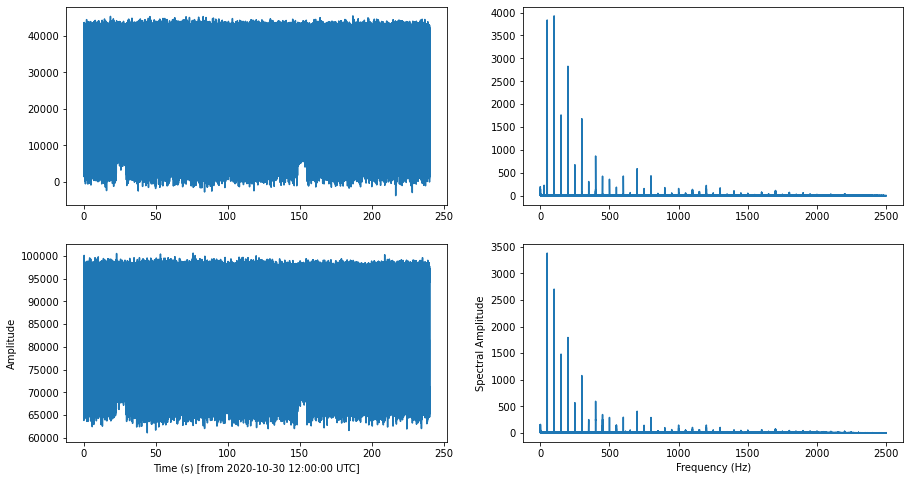

In [69]:

fig = __makeplot_2traces_and_spectra(f1_raw[0], f2_raw[0], fmax=None)

#__save_to([fig], opath, f"monobeams_{str(time)}_F2_rawtraceandspectrum10", "pdf")

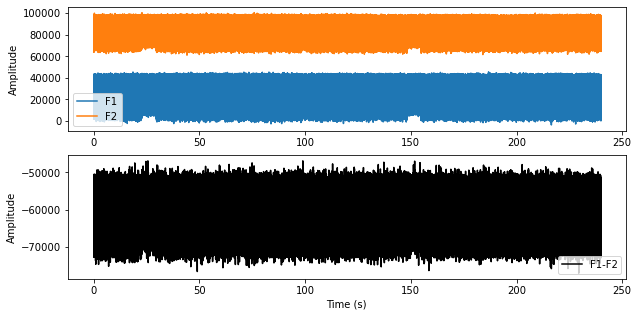

In [70]:

fig = __makeplot_compare_two_traces(f1_raw, f2_raw)

#__save_to([fig], opath, f"monobeams_{str(time)}_compare2traces10", "pdf")


In [ ]:
# #f1.resample(50.0)
# #f2.resample(50.0)

# freq = [0.01,10.0]
# #freq = [0.001,0.01]


# f1_fil = __filter_traces(f1, freq, detrend=True)
# f2_fil = __filter_traces(f2, freq, detrend=True)

In [ ]:
## _____________________________________________________________

#fig = __makeplot_rawandfiltered(f1_raw, f2_raw, f1_fil, f2_fil)

#__save_to([fig], opath, f"monobeams_{time}_rawandfiltered", mode="pdf")

## _____________________________________________________________

#fig = __makeplot_spectra(f1, f1_fil, f2, f2_fil, 0.15 ,0.3 ,freq)


#__save_to([fig], opath, f"monobeams_{time}_spectra", mode="pdf")


In [24]:

from obspy.clients.fdsn import Client



In [28]:
from obspy import read, UTCDateTime

tbeg = UTCDateTime("2021-03-02 17:00")
tend = UTCDateTime("2021-03-02 18:00")

f1 = read("/import/freenas-ffb-01-data/romy_archive/2021/BW/DROMY/F2V.D/BW.DROMY..F2V.D.2021.061",
          starttime=tbeg,
          endtime=tend,
         )

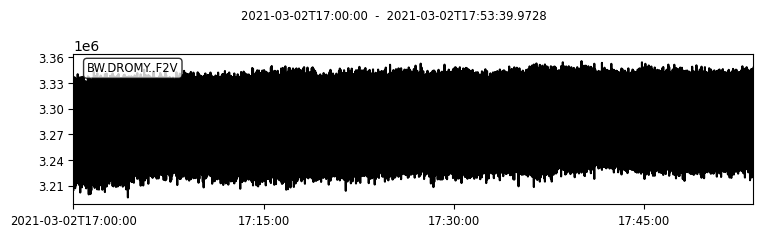

In [29]:
f1.plot();